In [ ]:
# Hospital Readmissions – Exploratory Analysis & Modeling

This notebook analyzes a synthetic hospital readmissions dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt## 1. Data Overview

First, check the structure of the cleaned dataset: row/column counts, data types, basic distributions,
and the overall readmission rate.
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

%matplotlib inline
sns.set(style="whitegrid")

CLEAN_PATH = "../data/hospital_readmissions_clean.csv"
df = pd.read_csv(CLEAN_PATH, parse_dates=["Admission_Date"])

df.head()


,Patient_ID,Admission_Date,Age,Gender,Primary_Language,Hospital_Region,Insurance_Type,Diagnosis_Code,Admission_Type,Comorbidities_Count,Length_of_Stay,Cost_of_Stay,Readmitted
0,1,2024-11-24,58,Female,Spanish,South,Medicare,A41,Urgent,3,10.1,21030.35,0
1,2,2025-01-11,28,Female,Other,Midwest,Medicaid,J44,Urgent,0,2.2,3227.00,0
2,3,2025-01-11,0,Female,Spanish,South,Medicare,F32,Emergency,0,9.5,8097.62,0
3,4,2025-01-11,47,Male,Spanish,Midwest,Private,F32,Emergency,1,4.1,5488.64,0
4,5,2025-01-11,95,Other,Spanish,West,Private,I10,Emergency,0,5.3,5384.99,0


In [ ]:
## 1. Data Overview

First, check the structure of the cleaned dataset: row/column counts, data types, basic distributions,
and the overall readmission rate.

In [2]:
print("Shape:", df.shape)
print("\nDtypes:")
print(df.dtypes)

print("\nNulls per column:")
print(df.isna().sum())

df.describe(include="all").T.head(15)


Shape: (10050, 13)

Dtypes:
Patient_ID                      int64
Admission_Date         datetime64[ns]
Age                             int64
Gender                         object
Primary_Language               object
Hospital_Region                object
Insurance_Type                 object
Diagnosis_Code                 object
Admission_Type                 object
Comorbidities_Count             int64
Length_of_Stay                float64
Cost_of_Stay                  float64
Readmitted                      int64
dtype: object

Nulls per column:
Patient_ID             0
Admission_Date         0
Age                    0
Gender                 0
Primary_Language       0
Hospital_Region        0
Insurance_Type         0
Diagnosis_Code         0
Admission_Type         0
Comorbidities_Count    0
Length_of_Stay         0
Cost_of_Stay           0
Readmitted             0
dtype: int64


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Patient_ID,10050.0,NaN,NaN,NaN,5001.155622,1.0,2504.25,4997.5,7499.75,10000.0,2886.060685
Admission_Date,10050,NaN,NaN,NaN,2025-01-10 20:28:30.805970432,2024-04-17 00:00:00,2025-01-11 00:00:00,2025-01-11 00:00:00,2025-01-11 00:00:00,2025-10-08 00:00:00,NaN
Age,10050.0,NaN,NaN,NaN,49.14199,0.0,10.0,48.0,83.0,120.0,35.703908
Gender,10050,3,Male,4976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary_Language,10050,8,English,7163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital_Region,10050,4,South,3382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance_Type,10050,5,Private,4359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diagnosis_Code,10050,11,I10,1270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Admission_Type,10050,4,Emergency,5511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comorbidities_Count,10050.0,NaN,NaN,NaN,1.19403,0.0,0.0,1.0,2.0,7.0,1.086819


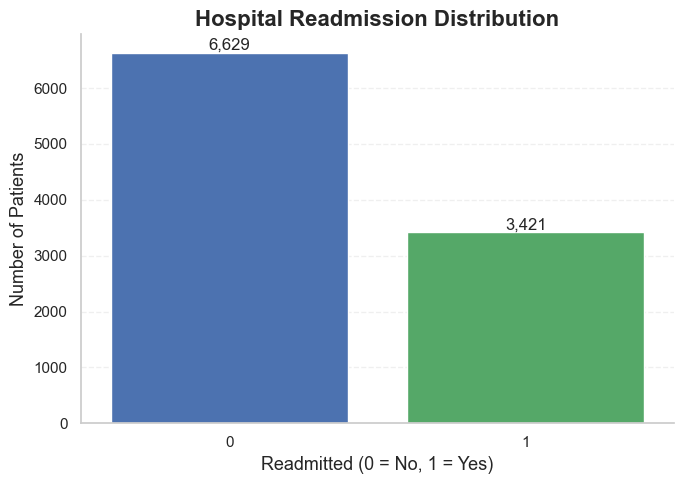

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for readability
plt.figure(figsize=(7, 5))

# Bar chart showing the distribution of readmissions
ax = sns.countplot(
    data=df,
    x="Readmitted"
)

# Manually set bar colors (avoids the palette/hue warning)
colors = ["#4C72B0", "#55A868"]  # Blue for No, Green for Yes
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)

# Add count labels above each bar (as integers)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{int(height):,}",
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=12
    )

# Title and axis labels for clarity
ax.set_title("Hospital Readmission Distribution", fontsize=16, weight="bold")
ax.set_xlabel("Readmitted (0 = No, 1 = Yes)", fontsize=13)
ax.set_ylabel("Number of Patients", fontsize=13)

# Light gridlines and removal of unnecessary chart borders
sns.despine()
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Ensure spacing looks clean
plt.tight_layout()
plt.show()


In [ ]:
## 2. Feature Engineering

Create age groups, time-based features, and a few simple buckets that will help
summarize risk patterns in the analysis and in downstream dashboards.


In [4]:
# Age groups
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 40, 60, 80, 120],
    labels=["<40", "40–60", "60–80", "80+"]
)

# Admission year / month
df["Admission_Year"] = df["Admission_Date"].dt.year
df["Admission_Month"] = df["Admission_Date"].dt.month

# LOS buckets
df["LOS_Bucket"] = pd.cut(
    df["Length_of_Stay"],
    bins=[0, 2, 5, 10, 60],
    labels=["0–2 days", "3–5 days", "6–10 days", "11+ days"]
)

# Cost per day (rough proxy for intensity)
df["Cost_Per_Day"] = df["Cost_of_Stay"] / df["Length_of_Stay"]

df[["Age", "Age_Group", "Length_of_Stay", "LOS_Bucket", "Cost_of_Stay", "Cost_Per_Day"]].head()


,Age,Age_Group,Length_of_Stay,LOS_Bucket,Cost_of_Stay,Cost_Per_Day
0,58,40–60,10.1,11+ days,21030.35,2082.212871
1,28,<40,2.2,3–5 days,3227.00,1466.818182
2,0,NaN,9.5,6–10 days,8097.62,852.381053
3,47,40–60,4.1,3–5 days,5488.64,1338.692683
4,95,80+,5.3,6–10 days,5384.99,1016.035849


In [ ]:
## 3. Exploratory Data Analysis (EDA)

### 3.1 Readmission Rate by Age Group

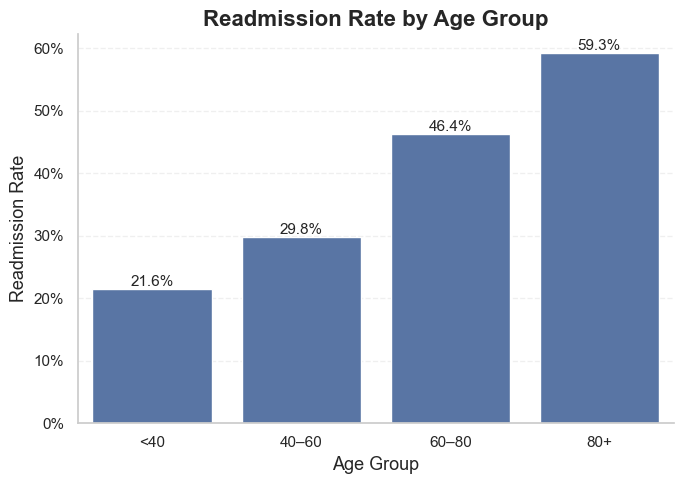

,Age_Group,Readmitted
0,<40,0.215609
1,40–60,0.297826
2,60–80,0.463569
3,80+,0.592509


In [8]:
from matplotlib.ticker import PercentFormatter

# Aggregate readmission rate by age group
age_readmit = (
    df.groupby("Age_Group", observed=True)["Readmitted"]
      .mean()
      .reset_index()
      .sort_values("Age_Group")  # keeps logical age order
)

fig, ax = plt.subplots(figsize=(7, 5))

# Bar chart of readmission rate by age group
sns.barplot(
    data=age_readmit,
    x="Age_Group",
    y="Readmitted",
    ax=ax,
    color="#4C72B0"
)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add percentage labels above each bar
for bar, rate in zip(ax.patches, age_readmit["Readmitted"]):
    height = bar.get_height()
    ax.annotate(
        f"{rate:.1%}",
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=11
    )

# Titles and axis labels
ax.set_title("Readmission Rate by Age Group", fontsize=16, weight="bold")
ax.set_xlabel("Age Group", fontsize=13)
ax.set_ylabel("Readmission Rate", fontsize=13)

# Light horizontal gridlines, no top/right spines
sns.despine()
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

age_readmit



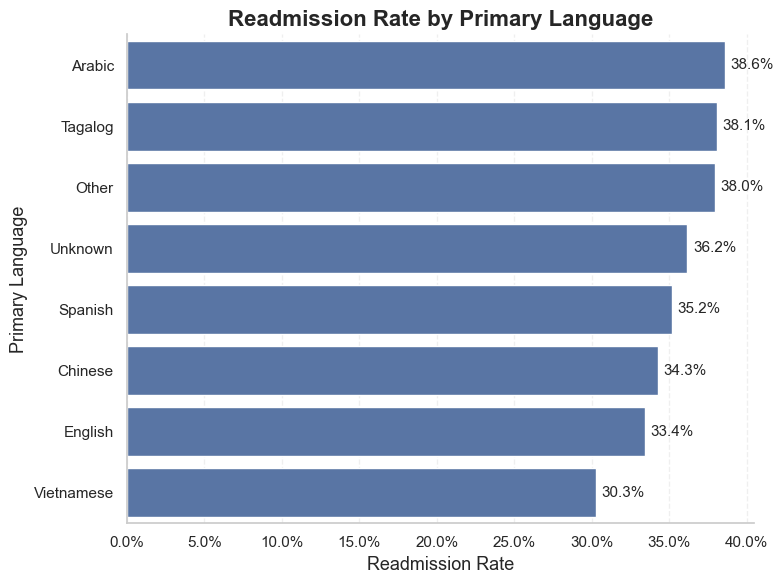

,Primary_Language,Readmitted
0,Arabic,0.385787
5,Tagalog,0.380952
3,Other,0.379538
6,Unknown,0.361842
4,Spanish,0.351900
1,Chinese,0.342949
2,English,0.334497
7,Vietnamese,0.302885


In [9]:
from matplotlib.ticker import PercentFormatter

# Aggregate readmission rate by primary language
lang_readmit = (
    df.groupby("Primary_Language", observed=True)["Readmitted"]
      .mean()
      .reset_index()
      .sort_values("Readmitted", ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 6))

# Horizontal bar chart of readmission rate by language
sns.barplot(
    data=lang_readmit,
    y="Primary_Language",
    x="Readmitted",
    ax=ax,
    color="#4C72B0"
)

# Format x-axis as percentages
ax.xaxis.set_major_formatter(PercentFormatter(1.0))

# Add percentage labels at the end of each bar
for bar, rate in zip(ax.patches, lang_readmit["Readmitted"]):
    width = bar.get_width()
    ax.annotate(
        f"{rate:.1%}",
        (width, bar.get_y() + bar.get_height() / 2),
        ha="left",
        va="center",
        fontsize=11,
        xytext=(4, 0),
        textcoords="offset points"
    )

# Titles and axis labels
ax.set_title("Readmission Rate by Primary Language", fontsize=16, weight="bold")
ax.set_xlabel("Readmission Rate", fontsize=13)
ax.set_ylabel("Primary Language", fontsize=13)

# Light vertical gridlines, no top/right spines
sns.despine()
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

lang_readmit.head(10)


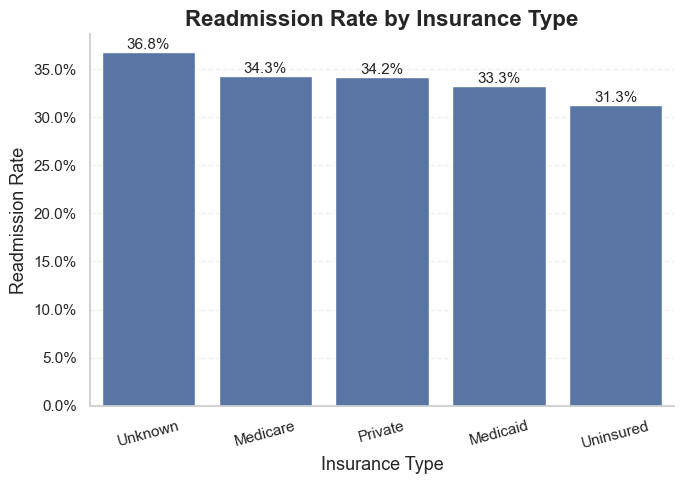

,Insurance_Type,Readmitted
4,Unknown,0.367725
1,Medicare,0.342876
2,Private,0.341592
0,Medicaid,0.333003
3,Uninsured,0.312715


In [10]:
# Aggregate readmission rate by insurance type
ins_readmit = (
    df.groupby("Insurance_Type", observed=True)["Readmitted"]
      .mean()
      .reset_index()
      .sort_values("Readmitted", ascending=False)
)

fig, ax = plt.subplots(figsize=(7, 5))

# Bar chart of readmission rate by insurance
sns.barplot(
    data=ins_readmit,
    x="Insurance_Type",
    y="Readmitted",
    ax=ax,
    color="#4C72B0"
)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add percentage labels above each bar
for bar, rate in zip(ax.patches, ins_readmit["Readmitted"]):
    height = bar.get_height()
    ax.annotate(
        f"{rate:.1%}",
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=11
    )

# Titles and axis labels
ax.set_title("Readmission Rate by Insurance Type", fontsize=16, weight="bold")
ax.set_xlabel("Insurance Type", fontsize=13)
ax.set_ylabel("Readmission Rate", fontsize=13)

# Rotate x labels for readability if needed
plt.xticks(rotation=15)

sns.despine()
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

ins_readmit


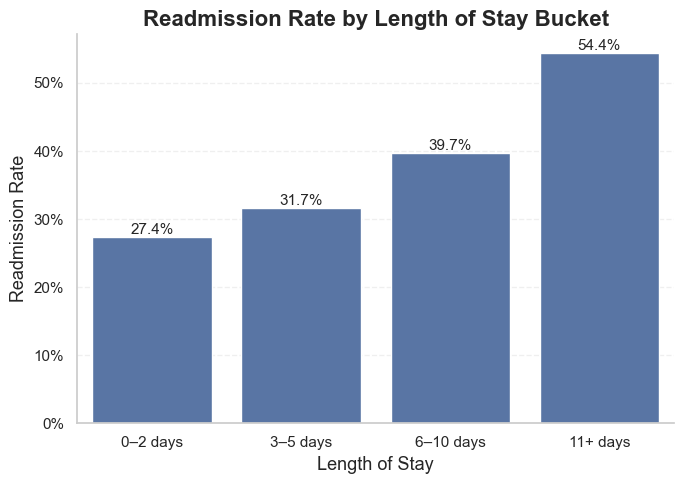

,LOS_Bucket,Readmitted
0,0–2 days,0.274175
1,3–5 days,0.316510
2,6–10 days,0.396721
3,11+ days,0.544061


In [11]:
# Aggregate readmission rate by length-of-stay bucket
los_readmit = (
    df.groupby("LOS_Bucket", observed=True)["Readmitted"]
      .mean()
      .reset_index()
      .sort_values("LOS_Bucket")  # keeps logical bucket order
)

fig, ax = plt.subplots(figsize=(7, 5))

sns.barplot(
    data=los_readmit,
    x="LOS_Bucket",
    y="Readmitted",
    ax=ax,
    color="#4C72B0"
)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add percentage labels above each bar
for bar, rate in zip(ax.patches, los_readmit["Readmitted"]):
    height = bar.get_height()
    ax.annotate(
        f"{rate:.1%}",
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=11
    )

ax.set_title("Readmission Rate by Length of Stay Bucket", fontsize=16, weight="bold")
ax.set_xlabel("Length of Stay", fontsize=13)
ax.set_ylabel("Readmission Rate", fontsize=13)

sns.despine()
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

los_readmit


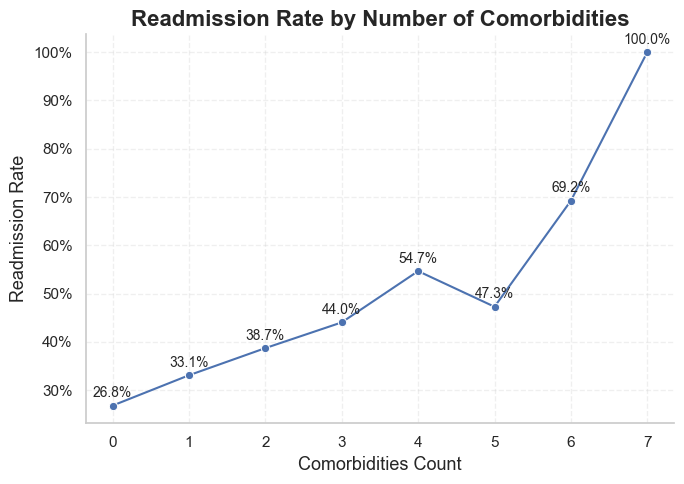

,Comorbidities_Count,Readmitted
0,0,0.268028
1,1,0.330852
2,2,0.387067
3,3,0.440324
4,4,0.546512


In [12]:
# Aggregate readmission rate by number of comorbidities
comorb_readmit = (
    df.groupby("Comorbidities_Count", observed=True)["Readmitted"]
      .mean()
      .reset_index()
      .sort_values("Comorbidities_Count")
)

fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(
    data=comorb_readmit,
    x="Comorbidities_Count",
    y="Readmitted",
    marker="o",
    ax=ax,
    color="#4C72B0"
)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on each point
for x, rate in zip(comorb_readmit["Comorbidities_Count"], comorb_readmit["Readmitted"]):
    ax.annotate(
        f"{rate:.1%}",
        (x, rate),
        ha="center",
        va="bottom",
        fontsize=10,
        xytext=(0, 4),
        textcoords="offset points"
    )

ax.set_title("Readmission Rate by Number of Comorbidities", fontsize=16, weight="bold")
ax.set_xlabel("Comorbidities Count", fontsize=13)
ax.set_ylabel("Readmission Rate", fontsize=13)

sns.despine()
ax.grid(axis="both", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

comorb_readmit.head()


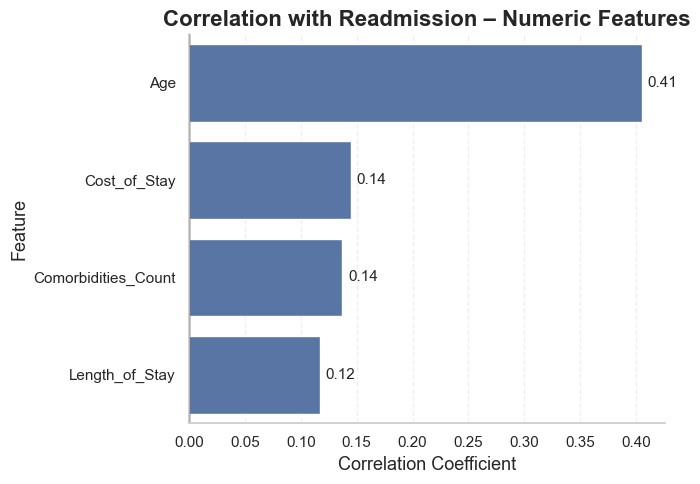

,Feature,Correlation
0,Age,0.405341
1,Cost_of_Stay,0.144657
2,Comorbidities_Count,0.137233
3,Length_of_Stay,0.117400


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features for correlation analysis
num_cols = [
    "Age",
    "Comorbidities_Count",
    "Length_of_Stay",
    "Cost_of_Stay",
    "Readmitted"
]

corr = df[num_cols].corr()

# Correlation of each feature with the target (Readmitted)
corr_target = (
    corr["Readmitted"]
    .drop("Readmitted")
    .sort_values(key=lambda s: s.abs(), ascending=False)
    .reset_index()
    .rename(columns={"index": "Feature", "Readmitted": "Correlation"})
)

fig, ax = plt.subplots(figsize=(7, 5))

# Horizontal bar chart of correlations with Readmitted
sns.barplot(
    data=corr_target,
    x="Correlation",
    y="Feature",
    ax=ax,
    color="#4C72B0"
)

# Add correlation labels at the end of each bar
for bar, value in zip(ax.patches, corr_target["Correlation"]):
    width = bar.get_width()
    ax.annotate(
        f"{value:.2f}",
        (width, bar.get_y() + bar.get_height() / 2),
        ha="left" if width >= 0 else "right",
        va="center",
        fontsize=11,
        xytext=(4 if width >= 0 else -4, 0),
        textcoords="offset points"
    )

# Reference line at zero correlation
ax.axvline(0, color="black", linewidth=1)

# Titles and axis labels
ax.set_title("Correlation with Readmission – Numeric Features", fontsize=16, weight="bold")
ax.set_xlabel("Correlation Coefficient", fontsize=13)
ax.set_ylabel("Feature", fontsize=13)

sns.despine()
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

corr_target



In [16]:
df_model = df.copy()

feature_cols = [
    "Age",
    "Comorbidities_Count",
    "Length_of_Stay",
    "Cost_of_Stay"
]

X = df_model[feature_cols]
y = df_model["Readmitted"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
df_model = df.copy()

feature_cols = [
    "Age",
    "Comorbidities_Count",
    "Length_of_Stay",
    "Cost_of_Stay"
]

X = df_model[feature_cols]
y = df_model["Readmitted"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


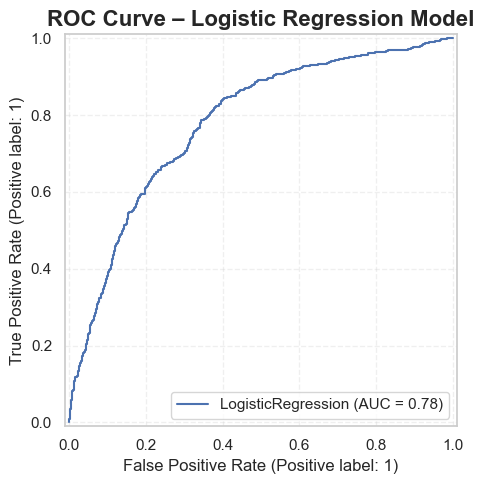

In [18]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(7, 5))

RocCurveDisplay.from_estimator(log_reg, X_test, y_test, ax=ax)

ax.set_title("ROC Curve – Logistic Regression Model", fontsize=16, weight="bold")
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1326
           1       0.64      0.53      0.58       684

    accuracy                           0.74      2010
   macro avg       0.71      0.69      0.70      2010
weighted avg       0.73      0.74      0.73      2010

ROC AUC: 0.779245278858282


In [20]:
df_model["Predicted_Readmit_Risk"] = log_reg.predict_proba(df_model[feature_cols])[:, 1]

TABLEAU_PATH = "../data/hospital_readmissions_for_tableau.csv"
df_model.to_csv(TABLEAU_PATH, index=False)

print(f"Saved Tableau-ready dataset → {TABLEAU_PATH}")


Saved Tableau-ready dataset → ../data/hospital_readmissions_for_tableau.csv
